# Analisi diffusione COVID-19

Il report per analisi ed andamento Covid-19 in diverse aree del mondo , sulla base del dataset curato da "Our World in Data".
Si riportano le  info del dataset:

In [1]:
import pandas as pd 
import numpy as np
from matplotlib  import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
cov= pd.read_csv('owid-covid-data.csv')
cov= cov.dropna(how='all')

In [3]:
rig=cov.shape[0:1]
col=cov.shape[1:]
print('- il dataframe in esame contiente righe pari a ',rig,'e colonne pari a ',col)


- il dataframe in esame contiente righe pari a  (388920,) e colonne pari a  (67,)


Di seguito verranno riportate tutte le richieste del committente per l'analisi.

# 1) Report casi totali per continente

Sulla base della richiesta effettuata ,si stila una report con un raggruppamento per continenti per il totale dei positivi in ogni continente, possiamo facilmente osservare che l'Asia è il continente piu colpito seguito dall'Europa.

continent
Africa            13141439
Asia             301451451
Europe           252417184
North America    124530677
Oceania           14814266
South America     68844492
Name: new_cases, dtype: int32

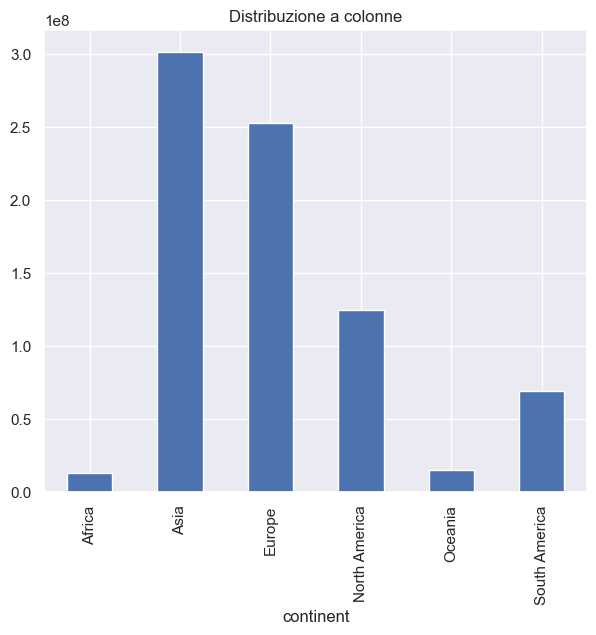

In [25]:
cov['date']=pd.to_datetime(cov.date)
cov['year']=cov.date.dt.year
cov['month']=cov.date.dt.month_name()

cov1= cov.loc[:,['year','month','continent','new_cases','total_cases']]
cov1c=cov1.dropna()

cov1c.loc[:, 'new_cases'] = cov1c['new_cases'].fillna(0).astype(int)

conti=cov1c.groupby('continent')
casi_cont= conti.new_cases.sum()
casi_cont = casi_cont.astype(int)

casi_cont.plot(kind='bar', figsize=(7,6))
plt.title('Distribuzione a colonne')
casi_cont

Text(0.5, 1.0, 'Distribuzione contagiati per continente')

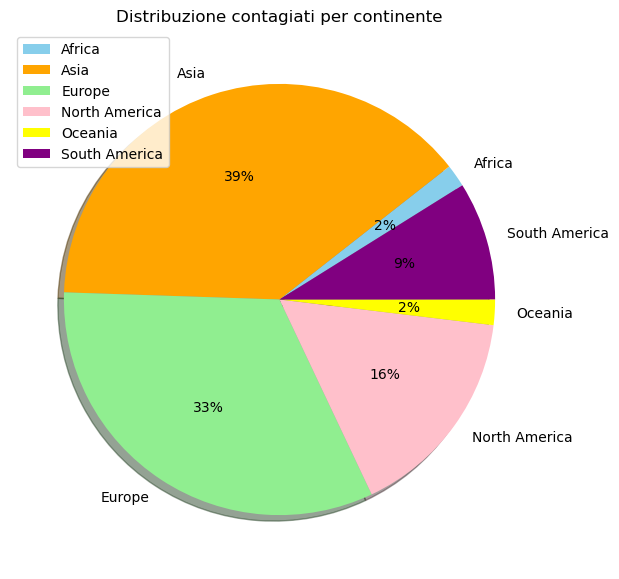

In [5]:
colors = ['skyblue', 'orange', 'lightgreen', 'pink', 'yellow', 'purple']
largest_slice = casi_cont.idxmax()
smallest_slice = casi_cont.idxmin()
casi_cont.plot(kind='pie', autopct='%1.0f%%', startangle=32, colors=colors, shadow=True, legend=True, figsize=(10,7)) #La dicitura autopct='%1.0f%%'  è stata usata per formattare le etichette delle percentuali che appaiono su ciascuna fetta del grafico. 
plt.ylabel('') 
plt.title('Distribuzione contagiati per continente')

# 2) Report confronto tra due continenti(ASIA-EUROPA) seguendo le richieste indicate:o

- valore massimo
- media  
- percentuale rispetto al numero dei casi totali nel mondo

In [6]:
asia=cov1.continent=='Asia'
euro=cov1.continent=='Europe'

eurasia=asia|euro

cov_eurasia=cov1.loc[eurasia]
cov_asia=cov1.loc[asia]
cov_euro=cov1.loc[euro]

max_e=cov_euro.new_cases.max()
max_a=cov_asia.new_cases.max()

mean_e=cov_euro.new_cases.mean()
mean_a=cov_asia.new_cases.mean()

sum_e=cov_euro.new_cases.sum()
sum_a=cov_asia.new_cases.sum()
sum_w=cov1c.new_cases.sum()

cov_eurasia.loc[:, 'new_cases'] = cov_eurasia['new_cases'].fillna(0).astype(int)

cov_eurasia_g=cov_eurasia.groupby(['continent'])['new_cases'].agg(['max','mean'])

cov_eurasia_g['%_world_cases']=cov_eurasia.groupby(['continent'])['new_cases'].sum() / sum_w * 100
cov_eurasia_g['%_world_cases'] = cov_eurasia_g['%_world_cases'].map("{:.2f}%".format) #formattazione colonna percentuale per visualizzare solo 2 decimali e visualizzare il %

cov_eurasia_g

,max,mean,%_world_cases
continent,,,
Asia,40475477.0,3924.638081,38.89%
Europe,2417043.0,3008.189536,32.56%


Passiamo alla visualizzazione di un grafico a barre per osservare l'andamento dei due continenti presi in considerazione, ne osseviamo :

- l'anno piu colpito dai contagi si dimostra essere il 2022, dove si trova quasi a raddoppiare i contagi rispetto al 2021
- nel 2023 l'Europa scende sotto il tetto di contagiati registrati ad inizio pandemia nel 2020 rispetto all'Asia
- nel 2024 osserviamo un appiattimento di contagiati per entrambi i continenti Asia ed Europa

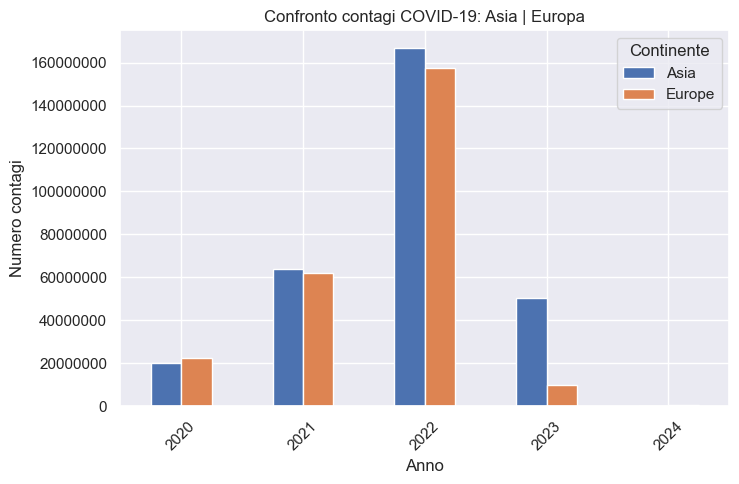

In [26]:
cov_eurasia_g2 = cov_eurasia.groupby(['year', 'continent'])['new_cases'].sum().unstack()
cov_eurasia_g2.plot(kind='bar', figsize=(7, 5))

plt.title('Confronto contagi COVID-19: Asia | Europa')
plt.ylabel('Numero contagi')
plt.xlabel('Anno')
plt.xticks(rotation=45)
plt.legend(title='Continente')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}')) #ho ricercato l'impostazione per visualizzare i valori interi
plt.show()

<Axes: xlabel='year', ylabel='new_cases'>

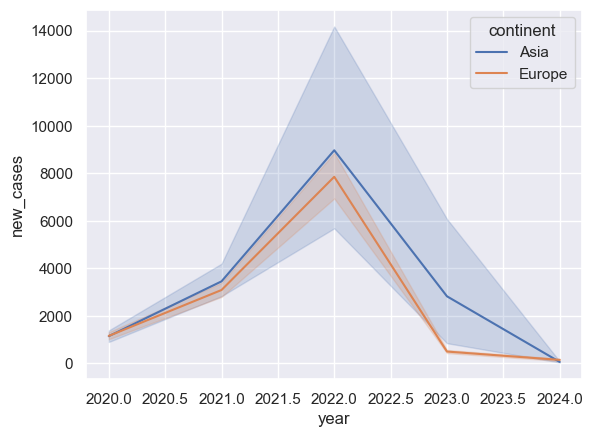

In [27]:
sns.set_theme(style="darkgrid")


# Plot the responses for different events and regions
sns.lineplot(x="year", y="new_cases",
             hue="continent",
             data=cov_eurasia)

# 3) Report contagi in ITALIA 2022

In merito alla situazione Covid-19 in Italia per l'anno 2022 possiamo osservare che l'anno viene chiuso raddoppiando il totale dei contagiati registrati ad inizio anno , come possiamo visualizzare nel grafico:

In [28]:
cov_locat=cov.loc[:,['date','year','month','continent','location','new_cases','total_cases']]
cov_locat=cov_locat.dropna()

ita_fil=cov_locat.location=='Italy'
cov_ita=cov_locat.loc[ita_fil]

fil_2022=cov_ita.year==2022
cov_ita_2022=cov_ita[fil_2022]

cov_ita_2022.loc[:, 'new_cases']=cov_ita_2022['new_cases'].fillna(0).astype(int)


cov_ita_2022_gru=cov_ita_2022.groupby(['month'])
cov_ita_2022_casi=cov_ita_2022_gru.total_cases.max()
cov_ita_2022_casi = cov_ita_2022_casi.astype(int)

ord=cov_ita_2022_casi.sort_values()
ord

month
January      10821375
February     12732680
March        14304111
April        16079209
May          17373741
June         18184917
July         21002773
August       21788862
September    22284812
October      23531023
November     24327664
December     25060503
Name: total_cases, dtype: int32

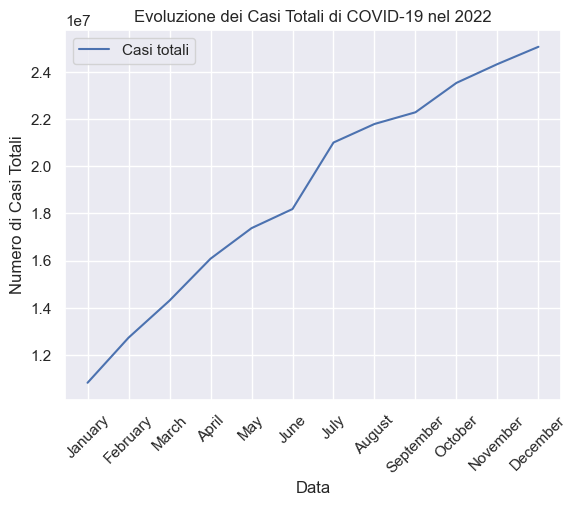

In [21]:
plt.plot(ord,label='Casi totali')
plt.title('Evoluzione dei Casi Totali di COVID-19 nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di Casi Totali')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Possiamo pero osservare come l'andamento dei nuovi contagiati  si concentri maggiormente dal 01-2022 al 03-2022 con ulteriore picco nel periodo che va dal 07-2022 al 09-2022 , facendo intuire la presenza di eventuali focolai nei periodi indicati , avendo parallelamente una diminuziuone dei contagiati per la del 12-2022.

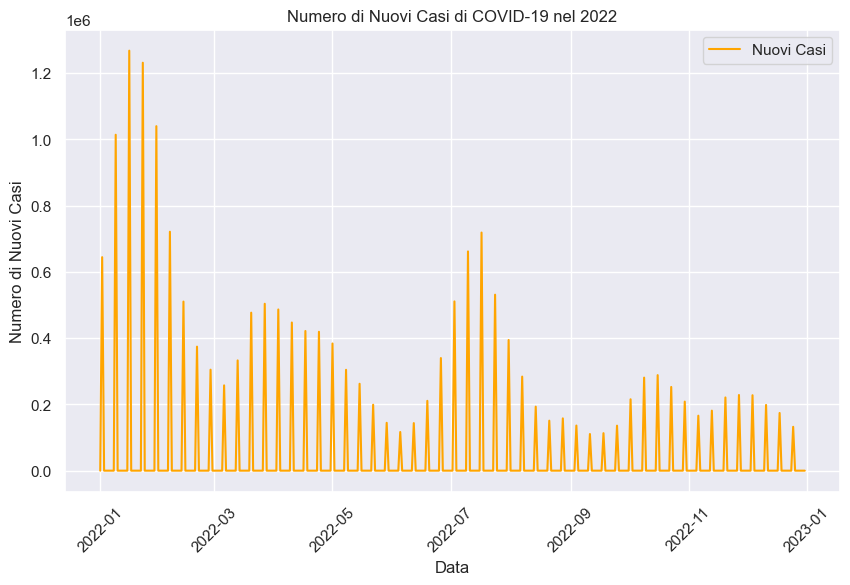

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(cov_ita_2022['date'], cov_ita_2022['new_cases'], label='Nuovi Casi', color='orange')
plt.title('Numero di Nuovi Casi di COVID-19 nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di Nuovi Casi')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# 4) Report per ITALIA , GERMANIA, FRANCIA sulla concentrazione di pazienti in terapia intensiva(ICU) nel periodo richiesto

Dal grafico che ne segue possiamo osservare un andamento diverso per ogni nazione , possiamo analizzare i diversi punti :
- per l'Italia la mediana per e la concentrazione del numero dei pazienti in ICU rimane sotto i 500 ospedalizzati
- per la Germania e la Francia osserviamo una mediana simile
- per la Germania e la Francia osserviamo un numero consistente di outliners che si distacca dal box, suggerendo periodi di stress maggiore per le strutture ospedaliere e la terapia intensiva


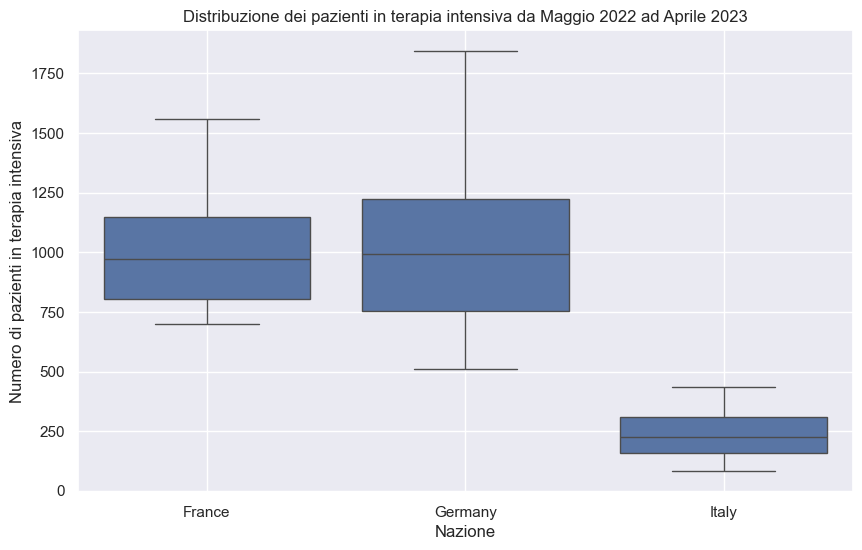

In [12]:
cov_icu=cov.loc[:,['date','year','month','location','icu_patients']]
cov_icu['date'] = pd.to_datetime(cov_icu['date'])

cov_icu=cov_icu.dropna()
cov_icu.icu_patients=cov_icu.icu_patients.fillna(0).astype(int)

it_icu=cov_icu.location=='Italy'
fr_icu=cov_icu.location=='France'
ge_icu=cov_icu.location=='Germany'
filtro_icu=it_icu+fr_icu+ge_icu
pat_icu=cov_icu.loc[filtro_icu]
pat_icu_range=pat_icu[(pat_icu.date>='2022-05-01') & (pat_icu.date<='2023-04-30')]


plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=pat_icu_range)
plt.title('Distribuzione dei pazienti in terapia intensiva da Maggio 2022 ad Aprile 2023')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva')
plt.grid(True)
plt.show()

# 5) Report pazienti ospedalizzati in ITALIA , FRANCIA , SPAGNA 

Secondo l'ultima richiesta del committente , possiamo osservare l'andamento degli ospedalizzati per le nazioni indicate notando che i dati non sono completi per tutte le nazioni 

In [29]:
cov_osp=cov.loc[:,['date','year','month','location','hosp_patients']]
cov_osp['date'] = pd.to_datetime(cov_osp['date'])

cov_osp=cov_osp.dropna()
cov_osp.hosp_patients=cov_osp.hosp_patients.fillna(0).astype(int)

it_osp=cov_osp.location=='Italy'
fr_osp=cov_osp.location=='France'
sp_osp=cov_osp.location=='Spain'
filtro_osp=it_osp+fr_osp+sp_osp

pat_osp=cov_osp.loc[filtro_osp]
osp2023=pat_osp.year==2023
pat2023=pat_osp.loc[osp2023]
pat2023.groupby(['location','month'])['hosp_patients'].max()#.reset_index()

location  month    
France    February     14316
          January      24157
          March        13434
Italy     April         3098
          August        1698
          December      7959
          February      3891
          January       8409
          July           910
          June          1840
          March         3455
          May           3007
          November      6021
          October       3756
          September     2939
Spain     April         2344
          February      1902
          January       3585
          June          2259
          March         2181
          May           2410
Name: hosp_patients, dtype: int32

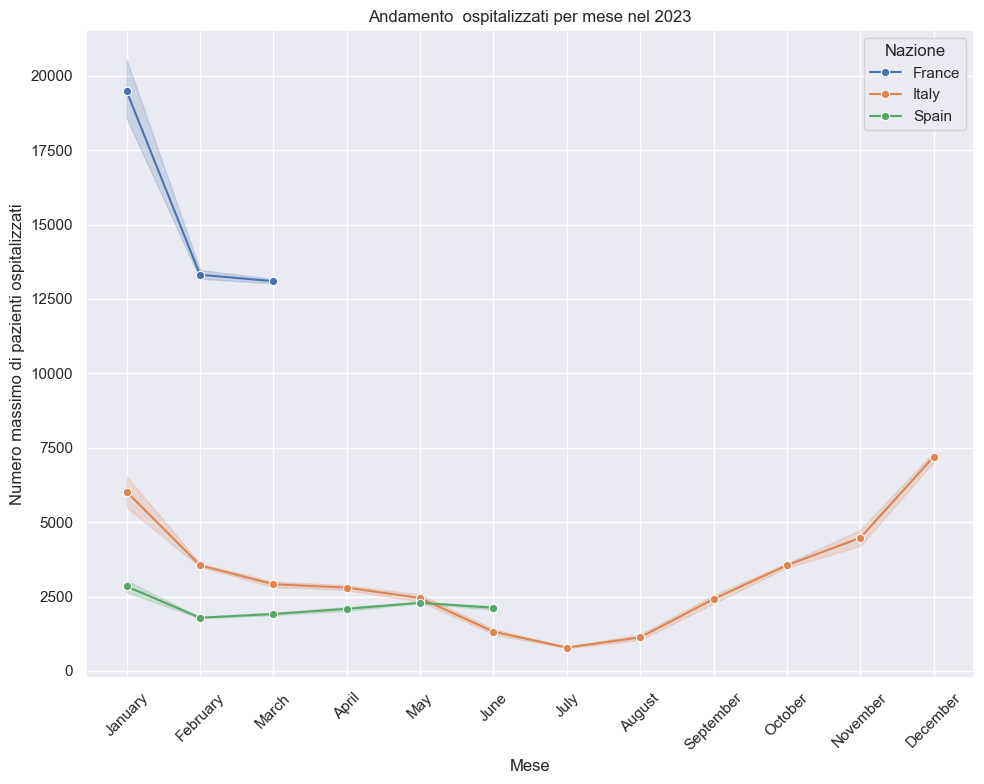

In [23]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=pat2023, x='month', y='hosp_patients', hue='location', marker='o')
plt.title('Andamento  ospitalizzati per mese nel 2023')
plt.xlabel('Mese')
plt.ylabel('Numero massimo di pazienti ospitalizzati') # Essendo dati cumolativi , ho preferito effetuare il max per ogni mese considerando il massimo valore per gli ospedalizzati 
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Nazione')
plt.tight_layout()

plt.show()

Possiamo osservare come i dati raccolti per la FRANCIA si interrompono a dal mese di Marzo , e per la Spagna a Giugno, tutto questo potrebbe suggerire che alcune nazioni dopo il termine dello stato d'emergenza mondiale per il Covid-19 abbiano smesso di raccogliere dati in merito alle ospedalizzazioni .

# La ricerca ed analisi dei dati  è stata effettuata da Antonio Granata , sperando di aver accolto correttamente ed elaborato tutte le richieste del committente .